In [4]:
import tensorflow as tf

2023-03-24 02:21:16.566615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import pandas as pd 
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt 
import os 
import pathlib 
import random

In [6]:
path = '/Users/Odyssey/Projects/ultrasound-dataset/Dataset_BUSI_with_GT'
data_dir = pathlib.Path(path)

In [7]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"])) # get the class names
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [8]:
# define paths to images and get the image count

benign_path = os.path.join(data_dir, 'benign')
malignant_path = os.path.join(data_dir, 'malignant')
normal_path = os.path.join(data_dir, 'normal')

In [9]:
# get the number of images in each folder
benign_count = len(os.listdir(benign_path))
malignant_count = len(os.listdir(malignant_path))
normal_count = len(os.listdir(normal_path))

print('benign images: ', benign_count, 'malignant images: ', malignant_count, 'normal images: ', normal_count)

benign images:  891 malignant images:  421 normal images:  266


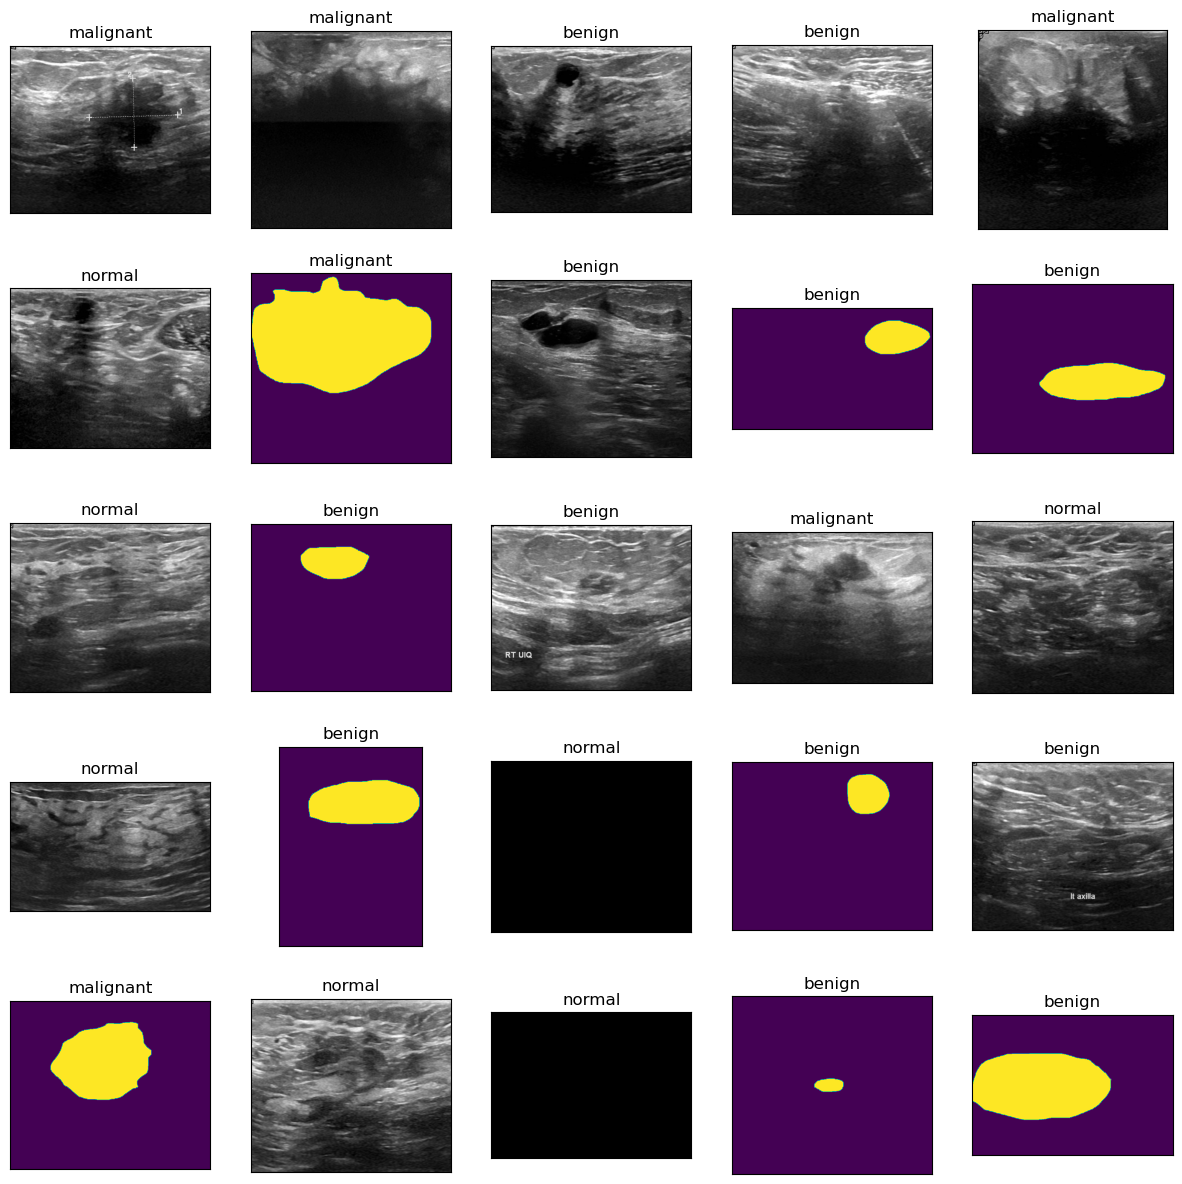

In [32]:
# make plotting of random images bfrom each class

plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    random_class = random.choice(class_names.tolist())  # Convert NumPy array to a list
    img = plt.imread(random.choice(list(data_dir.glob(random_class + '/*.png'))))
    plt.xticks([])
    plt.yticks([])
    plt.title(random_class)
    plt.imshow(img)

In [11]:
from pathlib import Path
import imghdr

image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

/var/folders/8m/pkfwlqk10l18rzskdsvz26sr0000gn/T/ipykernel_3965/1356360194.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [36]:
batch_size = 32
img_height = 224
img_width = 224

In [37]:
from tensorflow.keras.utils import image_dataset_from_directory

# create the training and validation datasets

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1578 files belonging to 3 classes.
Using 1263 files for training.
Found 1578 files belonging to 3 classes.
Using 315 files for validation.


In [38]:
# The model have 3 blocks where in each block we have one convolutional layer and a max pooling layer.

from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [39]:
# compile the model

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [40]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    batch_size=batch_size
)

Epoch 1/5


2023-03-24 03:10:32.050928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1263]
	 [[{{node Placeholder/_4}}]]
2023-03-24 03:10:32.051535: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1263]
	 [[{{node Placeholder/_4}}]]
/Users/Odyssey/opt/anaconda3/envs/breast/lib/python3.11/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _g

40/40 [==============================] - ETA: 0s - loss: 0.9414 - accuracy: 0.5495

2023-03-24 03:10:54.802583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [315]
	 [[{{node Placeholder/_4}}]]
2023-03-24 03:10:54.802997: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [315]
	 [[{{node Placeholder/_4}}]]


40/40 [==============================] - 24s 564ms/step - loss: 0.9414 - accuracy: 0.5495 - val_loss: 0.7648 - val_accuracy: 0.6952
Epoch 2/5
40/40 [==============================] - 22s 551ms/step - loss: 0.6871 - accuracy: 0.7086 - val_loss: 0.7232 - val_accuracy: 0.6825
Epoch 3/5
40/40 [==============================] - 23s 563ms/step - loss: 0.5525 - accuracy: 0.7601 - val_loss: 0.6998 - val_accuracy: 0.7079
Epoch 4/5
40/40 [==============================] - 24s 585ms/step - loss: 0.4613 - accuracy: 0.7957 - val_loss: 0.6967 - val_accuracy: 0.7175
Epoch 5/5
40/40 [==============================] - 27s 657ms/step - loss: 0.3388 - accuracy: 0.8686 - val_loss: 0.8208 - val_accuracy: 0.7683


In [41]:
# keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

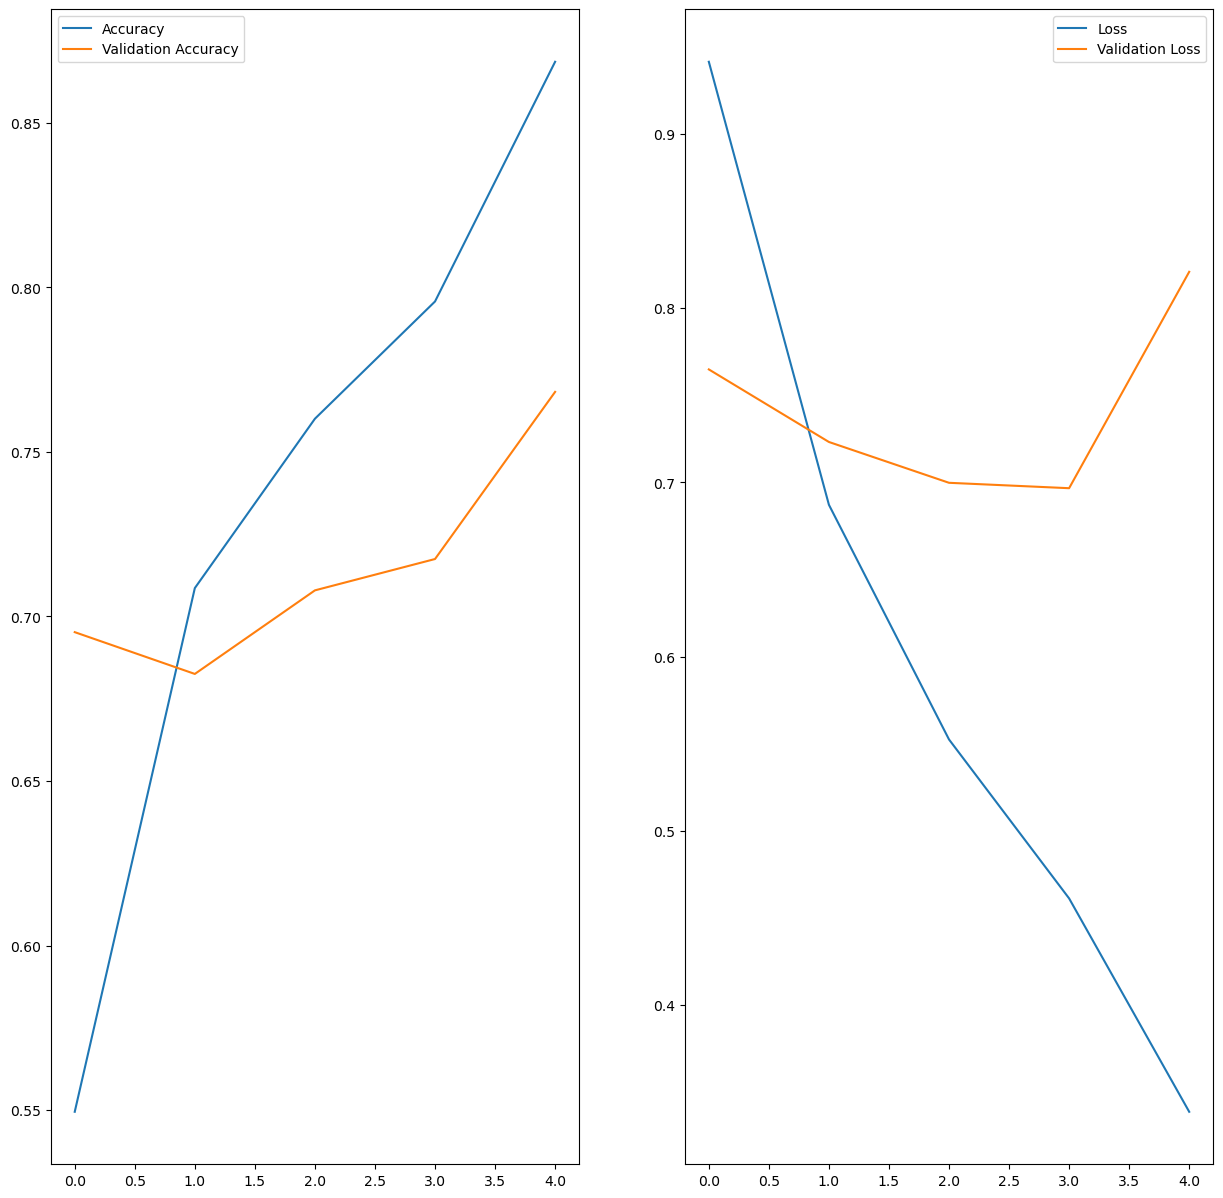

In [42]:
# plot the training and validation accuracy and loss

acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [43]:
model.evaluate(val_ds)

10/10 [==============================] - 2s 128ms/step - loss: 0.8208 - accuracy: 0.7683


[0.8208438754081726, 0.7682539820671082]

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 56, 56, 64)       